16000
2.4215


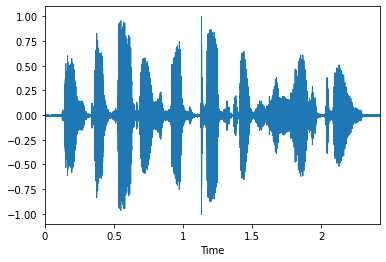

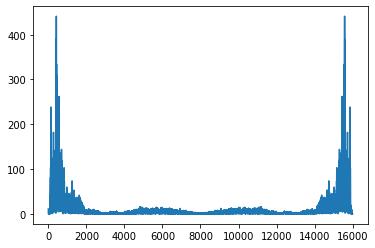

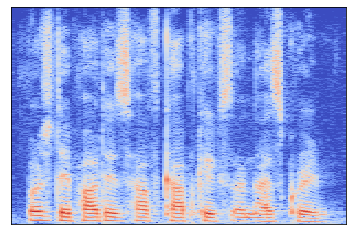

(13, 152)


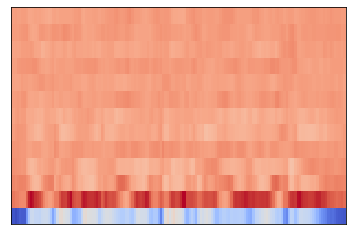

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
os.chdir("/content/drive/My Drive/ASVspoof2017_V2_train")
file="T_1000001.wav"
signal, sr=librosa.load(file,sr=16000)
print(sr)
print(len(signal)/sr)
librosa.display.waveplot(signal,sr=sr)
plt.show()
ft=np.fft.fft(signal)
ft=np.abs(ft)
freq=np.linspace(0,sr,len(signal))
plt.plot(freq,ft)
plt.show()
stft_n=1024
hop_len=256
stft=librosa.core.stft(signal,hop_length=hop_len,n_fft=stft_n)
specgram=librosa.amplitude_to_db(np.abs(stft))
librosa.display.specshow(specgram,sr=sr,hop_length=hop_len)
plt.show()
mfccs=librosa.feature.mfcc(signal,hop_length=hop_len,n_fft=stft_n,n_mfcc=13)
print(mfccs.shape)
librosa.display.specshow(mfccs,sr=sr,hop_length=hop_len)
plt.show()


In [ ]:
from IPython.display import Audio
os.chdir("/content/drive/My Drive/ASVspoof2017_V2_train")
filenatural="T_1000101.wav"
filespoof="T_1002111.wav"
signalnatural, sr=librosa.load(filenatural,sr=16000)
signalspoof, sr=librosa.load(filespoof,sr=16000)
print(sr)

16000


In [ ]:
#natural speech
Audio(signalnatural,rate=sr)

In [ ]:
#spoofed speech
Audio(signalspoof,rate=sr)

In [ ]:
#DONT RUN THIS AGAIN
cnt1=0
print(os.listdir())
names=os.listdir()
data={}
for i in names:
  if(not ("(" in i)):
    try:
      data[i]=librosa.load(i,sr=16000)[0]
    except:
      pass
    cnt1=cnt1+1
    print(cnt1)
print(data)

In [ ]:
#DO NOT RUN THIS AGAIN
import pickle
f = open("converted.pkl","wb")
pickle.dump(data,f)
f.close()

In [ ]:
#next time start execution from here
labels=pd.read_csv("/content/drive/My Drive/spoof1.csv")
print(labels.columns)
filt=labels.loc[:]["status"]=="genuine"
for i in range(0,len(labels)):
  if(labels.loc[i]["status"]=="genuine"):
      labels.loc[i]["status"]=1
  else:
    labels.loc[i]["status"]=0
print(labels)

Index(['file', 'status', 'm1', 'm2', 'm3', 'm4', 'm5'], dtype='object')
               file status     m1   m2   m3   m4   m5
0     T_1000001.wav      1  M0002  S05    -    -    -
1     T_1000002.wav      1  M0002  S09    -    -    -
2     T_1000003.wav      1  M0002  S01    -    -    -
3     T_1000004.wav      1  M0002  S10    -    -    -
4     T_1000005.wav      1  M0002  S04    -    -    -
...             ...    ...    ...  ...  ...  ...  ...
3009  T_1003012.wav      0  M0002  S01  E21  P03  R01
3010  T_1003013.wav      0  M0002  S02  E21  P02  R01
3011  T_1003014.wav      0  M0002  S07  E03  P01  R01
3012  T_1003015.wav      0  M0002  S10  E21  P02  R01
3013  T_1003016.wav      0  M0002  S06  E03  P01  R01

[3014 rows x 7 columns]


In [ ]:

import pickle
with open('converted.pkl', 'rb') as handle:
    data1 = pickle.load(handle)

In [ ]:

sorted=[]
for i in labels["file"]:
  try:
    sorted.append(data1[i])
  except:
    print(labels[labels["file"]==i])
print(len(sorted))
#labels=labels.drop(labels.index[802])
labels=labels.drop(labels.index[1644])
labels=labels.drop(labels.index[2213])
print(len(labels))
labels["signal"]=sorted

              file status     m1   m2 m3 m4 m5
802  T_1000804.wav      1  M0006  S08  -  -  -
               file status     m1   m2   m3   m4   m5
2213  T_1002216.wav      0  M0001  S01  E21  P02  R01
3010
3010


In [ ]:
import sklearn
y=labels.status
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(labels,y,train_size=0.4)
x_train_natural=x_train[x_train.status==1]
x_train_spoof=x_train[x_train.status==0]
x_test_natural=x_test[x_test.status==1]
x_test_spoof=x_test[x_test.status==0]
print(x_train_natural.columns)

Index(['file', 'status', 'm1', 'm2', 'm3', 'm4', 'm5', 'signal'], dtype='object')


In [ ]:
k=0
MFCC_natural=librosa.feature.mfcc(x_train_natural.signal.iloc[0],sr=16000,n_mfcc=20)
for sig in x_train_natural.signal[1:]:
  mfccs=librosa.feature.mfcc(sig,sr=16000,n_mfcc=20)
  MFCC_natural=np.hstack((MFCC_natural,mfccs))
  print(k)
  k=k+1
MFCC_natural=np.array(MFCC_natural)
MFCC_natural=MFCC_natural.T
print(MFCC_natural.shape)

In [ ]:
k=0
MFCC_spoof=librosa.feature.mfcc(x_train_spoof.signal.iloc[0],sr=16000,n_mfcc=20)
for sig in x_train_spoof.signal[1:]:
  mfccs=librosa.feature.mfcc(sig,sr=16000,n_mfcc=20)
  MFCC_spoof=np.hstack((MFCC_spoof,mfccs))
  print(k)
  k=k+1
MFCC_spoof=MFCC_spoof.T

In [ ]:
print(MFCC_natural.shape)
print(MFCC_spoof.shape)
labels_all=np.vstack((np.ones((MFCC_natural.shape[0],1)),np.zeros((MFCC_spoof.shape[0],1))))
features_all=np.vstack((MFCC_natural,MFCC_spoof))
print(labels_all)
print(features_all.shape)


(53962, 20)
(47043, 20)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
(101005, 20)


In [ ]:
#DONT RUN AGAIN
np.savetxt('train_features.csv', features_all, delimiter=',')
np.savetxt('train_labels.csv', labels_all, delimiter=',')
np.savetxt('train_natural_features.csv', MFCC_natural, delimiter=',')
np.savetxt('train_spoof_features.csv', MFCC_spoof, delimiter=',')

In [ ]:
#RUN FROM HERE
features_all = np.loadtxt('train_features.csv', delimiter=',')
labels_all = np.loadtxt('train_labels.csv', delimiter=',')
MFCC_spoof = np.loadtxt('train_spoof_features.csv', delimiter=',')
MFCC_natural = np.loadtxt('train_natural_features.csv', delimiter=',')

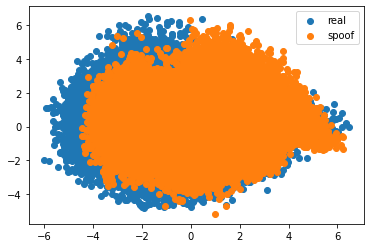

In [ ]:
#Data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1 = StandardScaler()
sc.fit(MFCC_natural)
MFCC_natural=sc.transform(MFCC_natural)
sc1.fit(MFCC_spoof)
MFCC_spoof=sc1.transform(MFCC_spoof)
pca = PCA(n_components=2)
nat_r = pca.fit(MFCC_natural).transform(MFCC_natural)
sp_r=pca.fit(MFCC_spoof).transform(MFCC_spoof)
#plt.scatter(nat_r[:,0],nat_r[:,1],label="real")
plt.scatter(nat_r[:,0],nat_r[:,1],label="real")
plt.scatter(sp_r[:,0],sp_r[:,1],label="spoof",alpha=1)
plt.legend()
plt.show()

In [ ]:
#TEST SCRIPT
k=0
MFCC_natural=librosa.feature.mfcc(x_test_natural.signal.iloc[0],sr=16000,n_mfcc=20)
for sig in x_test_natural.signal[1:200]:
  mfccs=librosa.feature.mfcc(sig,sr=16000,n_mfcc=20)
  MFCC_natural=np.hstack((MFCC_natural,mfccs))
  k=k+1
MFCC_natural=np.array(MFCC_natural)
MFCC_natural=MFCC_natural.T
k=0
MFCC_spoof=librosa.feature.mfcc(x_test_spoof.signal.iloc[0],sr=16000,n_mfcc=20)
for sig in x_test_spoof.signal[1:200]:
  mfccs=librosa.feature.mfcc(sig,sr=16000,n_mfcc=20)
  MFCC_spoof=np.hstack((MFCC_spoof,mfccs))
  k=k+1
MFCC_spoof=MFCC_spoof.T
labels_all_test=np.vstack((np.ones((MFCC_natural.shape[0],1)),np.zeros((MFCC_spoof.shape[0],1))))
features_all_test=np.vstack((MFCC_natural,MFCC_spoof))

In [ ]:
#DONT RUN TWICE
np.savetxt('test_features.csv', features_all_test, delimiter=',')
np.savetxt('test_labels.csv', labels_all_test, delimiter=',')

In [ ]:
#RUN THIS
features_all_test = np.loadtxt('test_features.csv', delimiter=',')
labels_all_test = np.loadtxt('test_labels.csv', delimiter=',')

In [ ]:
#DO NOT RUN TWICE
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1, C=0.01)
svm.fit(features_all, np.array(labels_all))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#DO NOT RUN TWICE
import pickle
# save the classifier
with open('svmclassifier.pkl', 'wb') as fid:
    pickle.dump(svm, fid)    

In [ ]:
# load it again
import pickle
with open('svmclassifier.pkl', 'rb') as fid:
    svm_loaded = pickle.load(fid)

In [ ]:
from sklearn.metrics import confusion_matrix
y_predsvmlin = svm_loaded.predict(features_all_test)
print("accuracy using svm(linear kernel) is")
print(1-sum(abs(y_predsvmlin-labels_all_test.reshape(1,labels_all_test.shape[0]).tolist()[0]))/features_all_test.shape[0])
conmat=confusion_matrix(labels_all_test, y_predsvmlin)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)

accuracy using svm(linear kernel) is
0.9591498431117162
confusion matrix is:
[[15528   727]
 [  653 16874]]
true negatives: 15528
false positives: 727
false negatives: 653
true positives: 16874


In [ ]:
#DO NOT RUN TWICE
from sklearn.svm import SVC
svmrbf = SVC(kernel='rbf', random_state=1, C=0.01)
svmrbf.fit(features_all, np.array(labels_all))

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#DO NOT RUN TWICE
import pickle
# save the classifier
with open('svmclassifierrbf.pkl', 'wb') as fid:
    pickle.dump(svmrbf, fid)    

In [ ]:
# load it again
with open('svmclassifierrbf.pkl', 'rb') as fid:
    svm_loadedrbf = pickle.load(fid)

In [ ]:
y_predsvmrbf = svm_loadedrbf.predict(features_all_test)
print("accuracy using svm(rbf kernel) is")
print(1-sum(abs(y_predsvmrbf-labels_all_test.reshape(1,labels_all_test.shape[0]).tolist()[0]))/features_all_test.shape[0])
conmat=confusion_matrix(labels_all_test, y_predsvmrbf)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)

accuracy using svm(rbf kernel) is
0.9436257102272727
confusion matrix is:
[[15182   846]
 [ 1059 16705]]
true negatives: 15182
false positives: 846
false negatives: 1059
true positives: 16705


In [ ]:
#DO NOT RUN
from sklearn.svm import SVC
svmpoly = SVC(kernel='poly', random_state=1, C=0.01)
svmpoly.fit(features_all, np.array(labels_all))

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
import pickle
# save the classifier
with open('svmclassifierpoly.pkl', 'wb') as fid:
    pickle.dump(svmpoly, fid)    

In [ ]:
# load it again
with open('svmclassifierpoly.pkl', 'rb') as fid:
    svm_loadedpoly = pickle.load(fid)

In [ ]:
y_predsvmpoly = svm_loadedpoly.predict(features_all_test)
print("accuracy using svm(polynomial kernel) is")
print(1-sum(abs(y_predsvmpoly-labels_all_test.reshape(1,labels_all_test.shape[0]).tolist()[0]))/features_all_test.shape[0])
conmat=confusion_matrix(labels_all_test, y_predsvmpoly)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)

accuracy using svm(polynomial kernel) is
0.9378847064393939
confusion matrix is:
[[15354   674]
 [ 1425 16339]]
true negatives: 15354
false positives: 674
false negatives: 1425
true positives: 16339


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(features_all, np.array(labels_all))
print("train done")
y_predknn = neigh.predict(features_all_test)
print("accuracy using knn is")
print(1-sum(abs(y_predknn-labels_all_test.reshape(1,labels_all_test.shape[0]).tolist()[0]))/features_all_test.shape[0])
conmat=confusion_matrix(labels_all_test, y_predknn)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)

train done
accuracy using knn is
0.9667376893939394
confusion matrix is:
[[15471   557]
 [  567 17197]]
true negatives: 15471
false positives: 557
false negatives: 567
true positives: 17197


In [ ]:
#ClASSIFICATION USING GMM
from sklearn.mixture import GaussianMixture
spoof_cent=np.sum(MFCC_spoof,axis=0)
natural_cent=np.sum(MFCC_natural,axis=0)
gmm1 = GaussianMixture(n_components=1).fit(MFCC_natural)
gmm2=  GaussianMixture(n_components=1).fit(MFCC_spoof)
ypredgmm=(gmm2.score_samples(features_all_test)<gmm1.score_samples(features_all_test))
print(gmm1.score_samples(features_all_test))
conmat=confusion_matrix(labels_all_test, ypredgmm)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for GMM is:")
print((tn+tp)/len(labels_all_test))

[-82.10770525 -79.59078519 -76.16681519 ... -84.12767884 -85.31056606
 -79.20487276]
confusion matrix is:
[[15222   473]
 [  732 16706]]
true negatives: 15222
false positives: 473
false negatives: 732
true positives: 16706
accuracy for GMM is:
0.9636314248634292


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(features_all, np.array(labels_all))
ypredrf=clf.predict(features_all_test)

#print(1-sum(abs(ypredrf-labels_all_test))/len(labels_all_test))
conmat=confusion_matrix(labels_all_test, ypredrf)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for random forest is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[13613  2415]
 [ 1392 16372]]
true negatives: 13613
false positives: 2415
false negatives: 1392
true positives: 16372
accuracy for random forest is:
0.8873401988636364


In [ ]:
#using majority voting
ypredall1=(ypredgmm+y_predknn+y_predsvmlin+y_predsvmrbf+ypredrf)/5
#yredall=(ypredgmm+y_predknn+1000)/2
ypredall=ypredall>0.5
print(ypredall)
print("accuracy for all models is:")
print(1-sum(abs(ypredall-labels_all_test))/len(ypredall))
conmat=confusion_matrix(labels_all_test, ypredall)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)


[1.  1.  1.  ... 0.2 0.  0. ]
accuracy for all models is:
0.9618548768939394
confusion matrix is:
[[15381   647]
 [  642 17122]]
true negatives: 15381
false positives: 647
false negatives: 642
true positives: 17122


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(features_all)
features_all=sc.transform(features_all)
lg=LogisticRegression()
lg.fit(features_all, np.array(labels_all))
y_predlr = lg.predict(features_all_test)
print("accuracy using logistic regression is")
print(1-sum(abs(y_predlr-labels_all_test.reshape(1,labels_all_test.shape[0]).tolist()[0]))/features_all_test.shape[0])
conmat=confusion_matrix(labels_all_test, y_predlr)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)

accuracy using logistic regression is
0.5462239583333333
confusion matrix is:
[[15986    42]
 [15292  2472]]
true negatives: 15986
false positives: 42
false negatives: 15292
true positives: 2472


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_all,labels_all)
ypred=clf.predict(features_all_test)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for Gaussian naive bayes is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[15222   473]
 [  732 16706]]
true negatives: 15222
false positives: 473
false negatives: 732
true positives: 16706
accuracy for Gaussian naive bayes is:
0.9636314248634292


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
base_learners = [('bl_1', GaussianNB()),('bl_2', KNeighborsClassifier(n_neighbors=3))             
                ]
clf = StackingClassifier(estimators= base_learners, final_estimator=GaussianNB())
clf.fit(features_all, labels_all)
predictions = clf.predict(features_all_test)
#score = clf.score(X_test, y_test)

In [ ]:
conmat=confusion_matrix(labels_all_test, predictions)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for stacking is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[15303   392]
 [  622 16816]]
true negatives: 15303
false positives: 392
false negatives: 622
true positives: 16816
accuracy for stacking is:
0.9693960703830018


In [ ]:
base_learners = [('bl_1', KNeighborsClassifier(n_neighbors=5)),('bl_2', KNeighborsClassifier(n_neighbors=3))             
                ]
clf = StackingClassifier(estimators= base_learners, final_estimator=LogisticRegression())
clf.fit(features_all, labels_all)
predictions = clf.predict(features_all_test)

In [ ]:
conmat=confusion_matrix(labels_all_test, predictions)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for stacking knn and naive bayes with logistic regression is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[15220   475]
 [  552 16886]]
true negatives: 15220
false positives: 475
false negatives: 552
true positives: 16886
accuracy for stacking knn and naive bayes with logistic regression is:
0.969003712310989


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(features_all)
features_all=sc.transform(features_all)
base_learners = [('bl_1', LogisticRegression()),('bl_2', KNeighborsClassifier(n_neighbors=3))]
clf = StackingClassifier(estimators= base_learners, final_estimator=GaussianNB())
clf.fit(features_all, labels_all)
predictions = clf.predict(features_all_test)

In [ ]:
conmat=confusion_matrix(labels_all_test, predictions)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for stacking logistic regression and knn with logistic regression is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[ 5731  9964]
 [  619 16819]]
true negatives: 5731
false positives: 9964
false negatives: 619
true positives: 16819
accuracy for stacking logistic regression and knn with logistic regression is:
0.6805903479914285


In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10,
                   learning_rate=1.0, algorithm='SAMME.R', random_state=None)
ad.fit(features_all,labels_all)
predictions = ad.predict(features_all_test)

In [ ]:
#adaboosted logistic regression
conmat=confusion_matrix(labels_all_test, predictions)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for boosted logistic regression is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[14725   970]
 [ 3899 13539]]
true negatives: 14725
false positives: 970
false negatives: 3899
true positives: 13539
accuracy for boosted logistic regression is:
0.8530468113361301


In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=None, n_estimators=2,
                   learning_rate=1.0, algorithm='SAMME.R', random_state=None)
ad.fit(features_all,labels_all)
predictions = ad.predict(features_all_test)

In [ ]:
#adaboosted decision tree
conmat=confusion_matrix(labels_all_test, predictions)
print("confusion matrix is:")
print(conmat)
tn, fp, fn, tp = conmat.ravel()
print("true negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("true positives:",tp)
print("accuracy for boosted decision tree is:")
print((tn+tp)/len(labels_all_test))

confusion matrix is:
[[11874  3821]
 [ 2692 14746]]
true negatives: 11874
false positives: 3821
false negatives: 2692
true positives: 14746
accuracy for boosted naive bayes is:
0.8034286059215887


In [ ]:
#PRACTICAL EXAMPLE DEMONSTRATION USING 2 EXAMPLES PLAYED AT START OF CODE
#USING KNN AS IT GIVES THE HIGHEST ACCURACY
mfccnat=librosa.feature.mfcc(signalnatural,sr=16000,n_mfcc=20)
print(mfccnat.shape)
mfccspoof=librosa.feature.mfcc(signalspoof,sr=16000,n_mfcc=20)
y_prednat = neigh.predict(mfccnat.T)
if 1-sum(y_prednat)/len(y_prednat) < 0.5:
    print("not spoof")
else:
    print("spoof")
y_predspoof = neigh.predict(mfccspoof.T)
if 1-sum(y_predspoof)/len(y_prednat)<0.5:
    print("not spoof")
else:
  print("spoof")

(20, 53)
not spoof
spoof


In [ ]:

!pip install ffmpeg-python

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
audio, sr = get_audio()
print(sr)

48000


In [ ]:
import scipy
import librosa
scipy.io.wavfile.write('recordingnatural.wav', sr, audio)
signalnatural, s = librosa.load('recordingnatural.wav', sr=16000)
Audio(y,rate=s)

In [ ]:
mfccnat=librosa.feature.mfcc(signalnatural,sr=16000,n_mfcc=20)
mfccnat=librosa.feature.mfcc(signalnatural,sr=16000,n_mfcc=20)
print(mfccnat.shape)
mfccspoof=librosa.feature.mfcc(signalspoof,sr=16000,n_mfcc=20)
y_prednat = neigh.predict(mfccnat.T)
if 1-sum(y_prednat)/len(y_prednat) < 0.5:
    print("not spoof")
else:
    print("spoof")


(20, 166)
not spoof


In [ ]:
audio, sr = get_audio()
print(sr)

In [ ]:
scipy.io.wavfile.write('recordingspoof.wav', sr, audio)
signalspoof, s = librosa.load('recordingspoof.wav', sr=16000)
Audio(y,rate=s)

In [ ]:
y_predspoof = neigh.predict(mfccspoof.T)
if sum(y_predspoof)/len(y_prednat)<0.5:
    print("not spoof")
else:
  print("spoof")